# Download Libraries

In [2]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install statsmodels


You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Import Packages

In [5]:
import requests
from bs4 import BeautifulSoup
import pprint as p
import pandas as pd
import numpy as np
import re
pd.options.display.max_columns = None

In [70]:
print(np.__version__)

1.15.4


# Data Collection

## Web Scraping - Player Stats

### Define Columns

In [6]:
### pre use define format of data frame
list_ = ['rank', 'player', 'pos', 'age', 'team_id', 'games', 'games_started', 'min_per_game', 'field_goals', 'field_goals_attempts', 'field_goals_pct', '3points', '3points_attempts', '3points_pct', '2points', '2points_attempts', '2points_pct', 'efg_pct', 'free_throws', 'free_throws_attempts', 'free_throws_pct', 'orb', 'drb', 'trb', 'assists', 'steals', 'blocks', 'turnovers', 'personal_fouls', 'points_per_game', 'year']
# col_names = player_df.columns
# print(list(col_names))
player_df_final = pd.DataFrame(columns=list_)
player_df_final

Empty DataFrame
Columns: [rank, player, pos, age, team_id, games, games_started, min_per_game, field_goals, field_goals_attempts, field_goals_pct, 3points, 3points_attempts, 3points_pct, 2points, 2points_attempts, 2points_pct, efg_pct, free_throws, free_throws_attempts, free_throws_pct, orb, drb, trb, assists, steals, blocks, turnovers, personal_fouls, points_per_game, year]
Index: []

### Scarping Function

In [10]:
def get_stats(tbody):
    player_dict = {'rank':[],'player':[], 'pos':[], 'age':[], 'team_id':[], 'games':[], 'games_started':[], 
               'min_per_game':[], 'field_goals':[], 'field_goals_attempts':[], 'field_goals_pct':[]
              ,'3points':[], '3points_attempts':[], '3points_pct':[],
              '2points':[], '2points_attempts':[], '2points_pct':[], 'efg_pct':[],
              'free_throws':[], 'free_throws_attempts':[], 'free_throws_pct':[],
              'orb':[], 'drb':[], 'trb':[],
              'assists':[], 'steals':[], 'blocks':[], 'turnovers':[], 'personal_fouls':[], 'points_per_game':[] }

    for test in tbody:
        try:

            player_dict['rank'].append(int(test.find('th', {'data-stat':'ranker'}).get_text()))
            player_dict['player'].append(test.find('td', {'data-stat':'player'}).get_text())
            player_dict['pos'].append(test.find('td', {'data-stat':'pos'}).get_text())
            player_dict['age'].append(test.find('td', {'data-stat':'age'}).get_text())
            player_dict['team_id'].append(test.find('td', {'data-stat':'team_id'}).get_text())
            player_dict['games'].append(test.find('td', {'data-stat':'g'}).get_text())
            player_dict['games_started'].append(test.find('td', {'data-stat':'gs'}).get_text())
            player_dict['min_per_game'].append(test.find('td', {'data-stat':'mp_per_g'}).get_text())
            player_dict['field_goals'].append(test.find('td', {'data-stat':'fg_per_g'}).get_text())
            player_dict['field_goals_attempts'].append(test.find('td', {'data-stat':'fga_per_g'}).get_text())
            player_dict['field_goals_pct'].append(test.find('td', {'data-stat':'fg_pct'}).get_text())
            player_dict['3points'].append(test.find('td', {'data-stat':'fg3_per_g'}).get_text())
            player_dict['3points_attempts'].append(test.find('td', {'data-stat':'fg3a_per_g'}).get_text())
            player_dict['3points_pct'].append(test.find('td', {'data-stat':'fg3_pct'}).get_text())
            player_dict['2points'].append(test.find('td', {'data-stat':'fg2_per_g'}).get_text())
            player_dict['2points_attempts'].append(test.find('td', {'data-stat':'fg2a_per_g'}).get_text())
            player_dict['2points_pct'].append(test.find('td', {'data-stat':'fg2_pct'}).get_text())
            player_dict['efg_pct'].append(test.find('td', {'data-stat':'efg_pct'}).get_text())
            player_dict['free_throws'].append(test.find('td', {'data-stat':'ft_per_g'}).get_text())
            player_dict['free_throws_attempts'].append(test.find('td', {'data-stat':'fta_per_g'}).get_text())
            player_dict['free_throws_pct'].append(test.find('td', {'data-stat':'ft_pct'}).get_text())
            player_dict['orb'].append(test.find('td', {'data-stat':'orb_per_g'}).get_text())
            player_dict['drb'].append(test.find('td', {'data-stat':'drb_per_g'}).get_text())
            player_dict['trb'].append(test.find('td', {'data-stat':'trb_per_g'}).get_text())
            player_dict['assists'].append(test.find('td', {'data-stat':'ast_per_g'}).get_text())
            player_dict['steals'].append(test.find('td', {'data-stat':'stl_per_g'}).get_text())
            player_dict['blocks'].append(test.find('td', {'data-stat':'blk_per_g'}).get_text())
            player_dict['turnovers'].append(test.find('td', {'data-stat':'tov_per_g'}).get_text())
            player_dict['personal_fouls'].append(test.find('td', {'data-stat':'pf_per_g'}).get_text())
            player_dict['points_per_game'].append(test.find('td', {'data-stat':'pts_per_g'}).get_text())

        except:
            continue


    return player_dict

### Start Scraping

In [11]:
### get url
for i in range(2010,2020):
    url = (f"https://www.basketball-reference.com/leagues/NBA_{i}_per_game.html")
    print(url)
    response = requests.get(url)  
    html_soup = BeautifulSoup(response.content,"lxml")
    table = html_soup.find('table', {'id':'per_game_stats'})
    tbody = table.find('tbody').find_all('tr')
    player_dict = get_stats(tbody)
    player_df = pd.DataFrame(player_dict)
    player_df['year'] = i
    player_df_final = player_df_final.append(player_df, ignore_index=True)

https://www.basketball-reference.com/leagues/NBA_2010_per_game.html
https://www.basketball-reference.com/leagues/NBA_2011_per_game.html
https://www.basketball-reference.com/leagues/NBA_2012_per_game.html
https://www.basketball-reference.com/leagues/NBA_2013_per_game.html
https://www.basketball-reference.com/leagues/NBA_2014_per_game.html
https://www.basketball-reference.com/leagues/NBA_2015_per_game.html
https://www.basketball-reference.com/leagues/NBA_2016_per_game.html
https://www.basketball-reference.com/leagues/NBA_2017_per_game.html
https://www.basketball-reference.com/leagues/NBA_2018_per_game.html
https://www.basketball-reference.com/leagues/NBA_2019_per_game.html


#### Export Pickle

In [7]:
player_df_final.to_pickle('player_stats_year_wise.pkl')

In [12]:
player_df_final = pd.read_pickle('player_stats_year_wise.pkl')

## Salary Data

In [16]:
salary_all_year = pd.read_csv('nba_salaries_1990_to_2018 (1).csv')

# Data Cleaning

## Filter for Year 2017

In [17]:
salary_2017 = salary_all_year.query('season_start==2017')

In [18]:
salary_2017.head()

player    salary  season_end  season_start team      team_name
414    Kent Bazemore  16910113        2018          2017  ATL  Atlanta Hawks
415  Dennis Schroder  15500000        2018          2017  ATL  Atlanta Hawks
416    Miles Plumlee  12500000        2018          2017  ATL  Atlanta Hawks
417   Jamal Crawford  10942762        2018          2017  ATL  Atlanta Hawks
418  Marco Belinelli   6606060        2018          2017  ATL  Atlanta Hawks

In [20]:
player_stat_2017 = player_df_final.query('year==2018')

In [21]:
player_stat_2017.head()

rank         player pos age team_id games games_started min_per_game  \
4762    1   Alex Abrines  SG  24     OKC    75             8         15.1   
4763    2     Quincy Acy  PF  27     BRK    70             8         19.4   
4764    3   Steven Adams   C  24     OKC    76            76         32.7   
4765    4    Bam Adebayo   C  20     MIA    69            19         19.8   
4766    5  Arron Afflalo  SG  32     ORL    53             3         12.9   

     field_goals field_goals_attempts field_goals_pct 3points  \
4762         1.5                  3.9            .395     1.1   
4763         1.9                  5.2            .356     1.5   
4764         5.9                  9.4            .629     0.0   
4765         2.5                  4.9            .512     0.0   
4766         1.2                  3.1            .401     0.5   

     3points_attempts 3points_pct 2points 2points_attempts 2points_pct  \
4762              2.9        .380     0.4              0.9        .443   
4763              4.2        .349     0.4              1.0        .384   
4764              0.0        .000     5.9              9.3        .631   
4765              0.1        .000     2.5              4.8        .523   
4766              1.3        .386     0.7              1.7        .413   

     efg_pct free_throws free_throws_attempts free_throws_pct  orb  drb  trb  \
4762    .540         0.5                  0.6            .848  0.3  1.2  1.5   
4763    .496         0.7                  0.9            .817  0.6  3.1  3.7   
4764    .629         2.1                  3.8            .559  5.1  4.0  9.0   
4765    .512         1.9                  2.6            .721  1.7  3.8  5.5   
4766    .485         0.4                  0.5            .846  0.1  1.2  1.2   

     assists steals blocks turnovers personal_fouls points_per_game  year  
4762     0.4    0.5    0.1       0.3            1.7             4.7  2018  
4763     0.8    0.5    0.4       0.9            2.1             5.9  2018  
4764     1.2    1.2    1.0       1.7            2.8            13.9  2018  
4765     1.5    0.5    0.6       1.0            2.0             6.9  2018  
4766     0.6    0.1    0.2       0.4            1.1             3.4  2018

## Clean Names

In [23]:
player_stat_2017['player'] = player_stat_2017['player'].str.replace(r'[^\w\s]', '').str.lower()
salary_2017['player'] = salary_2017['player'].str.replace(r'[^\w\s]', '').str.lower()

In [24]:
player_stat_2017 = player_stat_2017.merge(salary_2017[['player', 'salary', ]], how = 'left', left_on = 'player', right_on = 'player')

In [25]:
player_stat_2017.head()

rank         player pos age team_id games games_started min_per_game  \
0    1   alex abrines  SG  24     OKC    75             8         15.1   
1    2     quincy acy  PF  27     BRK    70             8         19.4   
2    3   steven adams   C  24     OKC    76            76         32.7   
3    4    bam adebayo   C  20     MIA    69            19         19.8   
4    5  arron afflalo  SG  32     ORL    53             3         12.9   

  field_goals field_goals_attempts field_goals_pct 3points 3points_attempts  \
0         1.5                  3.9            .395     1.1              2.9   
1         1.9                  5.2            .356     1.5              4.2   
2         5.9                  9.4            .629     0.0              0.0   
3         2.5                  4.9            .512     0.0              0.1   
4         1.2                  3.1            .401     0.5              1.3   

  3points_pct 2points 2points_attempts 2points_pct efg_pct free_throws  \
0        .380     0.4              0.9        .443    .540         0.5   
1        .349     0.4              1.0        .384    .496         0.7   
2        .000     5.9              9.3        .631    .629         2.1   
3        .000     2.5              4.8        .523    .512         1.9   
4        .386     0.7              1.7        .413    .485         0.4   

  free_throws_attempts free_throws_pct  orb  drb  trb assists steals blocks  \
0                  0.6            .848  0.3  1.2  1.5     0.4    0.5    0.1   
1                  0.9            .817  0.6  3.1  3.7     0.8    0.5    0.4   
2                  3.8            .559  5.1  4.0  9.0     1.2    1.2    1.0   
3                  2.6            .721  1.7  3.8  5.5     1.5    0.5    0.6   
4                  0.5            .846  0.1  1.2  1.2     0.6    0.1    0.2   

  turnovers personal_fouls points_per_game  year      salary  
0       0.3            1.7             4.7  2018   5725000.0  
1       0.9            2.1             5.9  2018   1709538.0  
2       1.7            2.8            13.9  2018  22471910.0  
3       1.0            2.0             6.9  2018   2490360.0  
4       0.4            1.1             3.4  2018   2328652.0

## Removes Players with No Salary

In [26]:
player_stat_2017 = player_stat_2017[player_stat_2017['salary'].notnull()]

In [27]:
player_stat_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 0 to 682
Data columns (total 32 columns):
rank                    582 non-null object
player                  582 non-null object
pos                     582 non-null object
age                     582 non-null object
team_id                 582 non-null object
games                   582 non-null object
games_started           582 non-null object
min_per_game            582 non-null object
field_goals             582 non-null object
field_goals_attempts    582 non-null object
field_goals_pct         582 non-null object
3points                 582 non-null object
3points_attempts        582 non-null object
3points_pct             582 non-null object
2points                 582 non-null object
2points_attempts        582 non-null object
2points_pct             582 non-null object
efg_pct                 582 non-null object
free_throws             582 non-null object
free_throws_attempts    582 non-null object
free_throws_pct

## Remove Multiple Rows and combine Stats

In [29]:
player_stat_2017['games'] = player_stat_2017['games'].astype(int)

In [30]:
player_stat_2017.sort_values(by=['player', 'games'], ascending=[True, False], inplace=True)

### changed data set name here

In [35]:
player_stat_1 = player_stat_2017.drop_duplicates(subset='player', keep='first')

In [36]:
player_stat_1[player_stat_1['player'].str.contains('avery')]

rank         player pos age team_id  games games_started min_per_game  \
72   61  avery bradley  SG  27     TOT     46            46         31.2   

   field_goals field_goals_attempts field_goals_pct 3points 3points_attempts  \
72         5.6                 13.6            .414     1.6              4.4   

   3points_pct 2points 2points_attempts 2points_pct efg_pct free_throws  \
72        .369     4.0              9.2        .436    .474         1.4   

   free_throws_attempts free_throws_pct  orb  drb  trb assists steals blocks  \
72                  1.8            .768  0.5  2.0  2.5     2.0    1.1    0.2   

   turnovers personal_fouls points_per_game  year     salary  
72       2.2            2.0            14.3  2018  8808989.0

### Assign team to player based on maximum games

In [31]:
dup = player_stat_2017[player_stat_2017.duplicated(subset='player', keep=False)].sort_values(by='player')

In [32]:
rem_tot = dup.query('team_id!="TOT"')

In [31]:
rem_tot = rem_tot.sort_values(by=['player', 'games'], ascending=[True, False])

In [32]:
rem_tot = rem_tot.drop_duplicates(subset='player', keep='first')

### Join with main Data

In [37]:
player_stat_1 = player_stat_1.merge(rem_tot[['player', 'team_id']], how = 'left', left_on = 'player', right_on='player')

In [38]:
player_stat_1['team_id_y'].fillna(player_stat_1['team_id_x'], inplace= True)

In [39]:
player_stat_1.drop('team_id_x', axis = 1, inplace= True)

In [40]:
player_stat_1.rename(columns={'team_id_y':'team_id'}, inplace=True)

## Combine positions

In [42]:
player_stat_1['pos'].unique()

### SG/PG/PG-SG = back
### other front(PF,C,SF) - front
### SF-SG - special. only 2 players with this case
#player_stat_1.query('pos=="SF-SG"')

array(['PG', 'PF', 'SF', 'C', 'SG', 'SF-SG', 'PG-SG'], dtype=object)

In [43]:
### is in doesnot work
player_stat_1['new_pos'] = player_stat_1['pos'].apply(lambda x: 'back' if x in(['SG','PG','PG-SG']) 
                           else ('front' if x in ['PF','C','SF'] else 'special'))

## Get Team Ranking

In [45]:
team_rank = pd.read_csv('team_rank.csv')


In [47]:
player_stat_1 = player_stat_1.merge(team_rank, how = 'left', left_on='team_id', right_on='team_id')

In [48]:
player_stat_1.rename(columns={'rank_x':'player_rank', 'rank_y':'team_rank', 'points':'team_points'}, inplace=True)

## Convert to int and float

In [49]:
int_col = ['age',  'games', 'games_started', 'team_rank']
float_col = ['min_per_game', 'field_goals', 'field_goals_attempts',
       'field_goals_pct', '3points', '3points_attempts', '3points_pct',
       '2points', '2points_attempts', '2points_pct', 'efg_pct', 'free_throws',
       'free_throws_attempts', 'free_throws_pct', 'orb', 'drb', 'trb',
            'assists', 'steals', 'blocks', 'turnovers', 'personal_fouls',
       'points_per_game', 'team_points']

In [50]:
player_stat_1[int_col] = player_stat_1[int_col].apply(pd.to_numeric, axis = 1)
player_stat_1[float_col] = player_stat_1[float_col].apply(pd.to_numeric, axis = 1)

In [51]:
player_stat_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524 entries, 0 to 523
Data columns (total 36 columns):
player_rank             524 non-null object
player                  524 non-null object
pos                     524 non-null object
age                     524 non-null int64
games                   524 non-null int64
games_started           524 non-null int64
min_per_game            524 non-null float64
field_goals             524 non-null float64
field_goals_attempts    524 non-null float64
field_goals_pct         523 non-null float64
3points                 524 non-null float64
3points_attempts        524 non-null float64
3points_pct             483 non-null float64
2points                 524 non-null float64
2points_attempts        524 non-null float64
2points_pct             518 non-null float64
efg_pct                 523 non-null float64
free_throws             524 non-null float64
free_throws_attempts    524 non-null float64
free_throws_pct         508 non-null float64
orb 

In [52]:
player_stat_1.head(2)

player_rank        player pos  age  games  games_started  min_per_game  \
0          65  aaron brooks  PG   33     32              1           5.9   
1         179  aaron gordon  PF   22     58             57          32.9   

   field_goals  field_goals_attempts  field_goals_pct  3points  \
0          0.9                   2.2            0.406      0.3   
1          6.5                  14.9            0.434      2.0   

   3points_attempts  3points_pct  2points  2points_attempts  2points_pct  \
0               1.0        0.355      0.5               1.2        0.447   
1               5.9        0.336      4.5               9.0        0.497   

   efg_pct  free_throws  free_throws_attempts  free_throws_pct  orb  drb  trb  \
0    0.486          0.3                   0.3            0.727  0.2  0.3  0.5   
1    0.500          2.7                   3.9            0.698  1.5  6.4  7.9   

   assists  steals  blocks  turnovers  personal_fouls  points_per_game  year  \
0      0.6     0.2     0.0        0.3             0.9              2.3  2018   
1      2.3     1.0     0.8        1.8             1.9             17.6  2018   

      salary team_id new_pos  team_points                    team  team_rank  
0  2116955.0     MIN    back        0.573  Minnesota Timberwolves         13  
1  5504420.0     ORL   front        0.305           Orlando Magic         26

In [52]:
player_stat_1.to_pickle('tfa_working_ver_1')

# Analysis & Modeling

In [56]:
import pandas as pd
import numpy as np
import seaborn as sb
All_data = pd.read_pickle('tfa_working_ver_1')
All_data.head(2)

player_rank        player pos  age  games  games_started  min_per_game  \
0          65  aaron brooks  PG   33     32              1           5.9   
1         179  aaron gordon  PF   22     58             57          32.9   

   field_goals  field_goals_attempts  field_goals_pct  3points  \
0          0.9                   2.2            0.406      0.3   
1          6.5                  14.9            0.434      2.0   

   3points_attempts  3points_pct  2points  2points_attempts  2points_pct  \
0               1.0        0.355      0.5               1.2        0.447   
1               5.9        0.336      4.5               9.0        0.497   

   efg_pct  free_throws  free_throws_attempts  free_throws_pct  orb  drb  trb  \
0    0.486          0.3                   0.3            0.727  0.2  0.3  0.5   
1    0.500          2.7                   3.9            0.698  1.5  6.4  7.9   

   assists  steals  blocks  turnovers  personal_fouls  points_per_game  year  \
0      0.6     0.2     0.0        0.3             0.9              2.3  2018   
1      2.3     1.0     0.8        1.8             1.9             17.6  2018   

      salary team_id new_pos  team_points                    team  team_rank  
0  2116955.0     MIN    back        0.573  Minnesota Timberwolves         13  
1  5504420.0     ORL   front        0.305           Orlando Magic         26

## Dummy Variable

In [59]:
All_data
All_data['Position_back']=np.where((All_data['new_pos']=='back'),1,0)
All_data['Position_front']=np.where((All_data['new_pos']=='front'),1,0)
#All_data[All_data['new_pos']=='special']

# X = All_data[['age', 'games', 'games_started', 'min_per_game', 'field_goals', 'field_goals_attempts', '2points', '2points_attempts', \
#               '3points', '3points_attempts',  'free_throws', 'orb','drb', 'trb', 'assists', 'steals', 'blocks','free_throws_attempts', \
#               'turnovers', 'personal_fouls', 'points_per_game', 'team_points']] 
# import seaborn as sb
# sb.pairplot(X)

## Pair Plot and Correlation

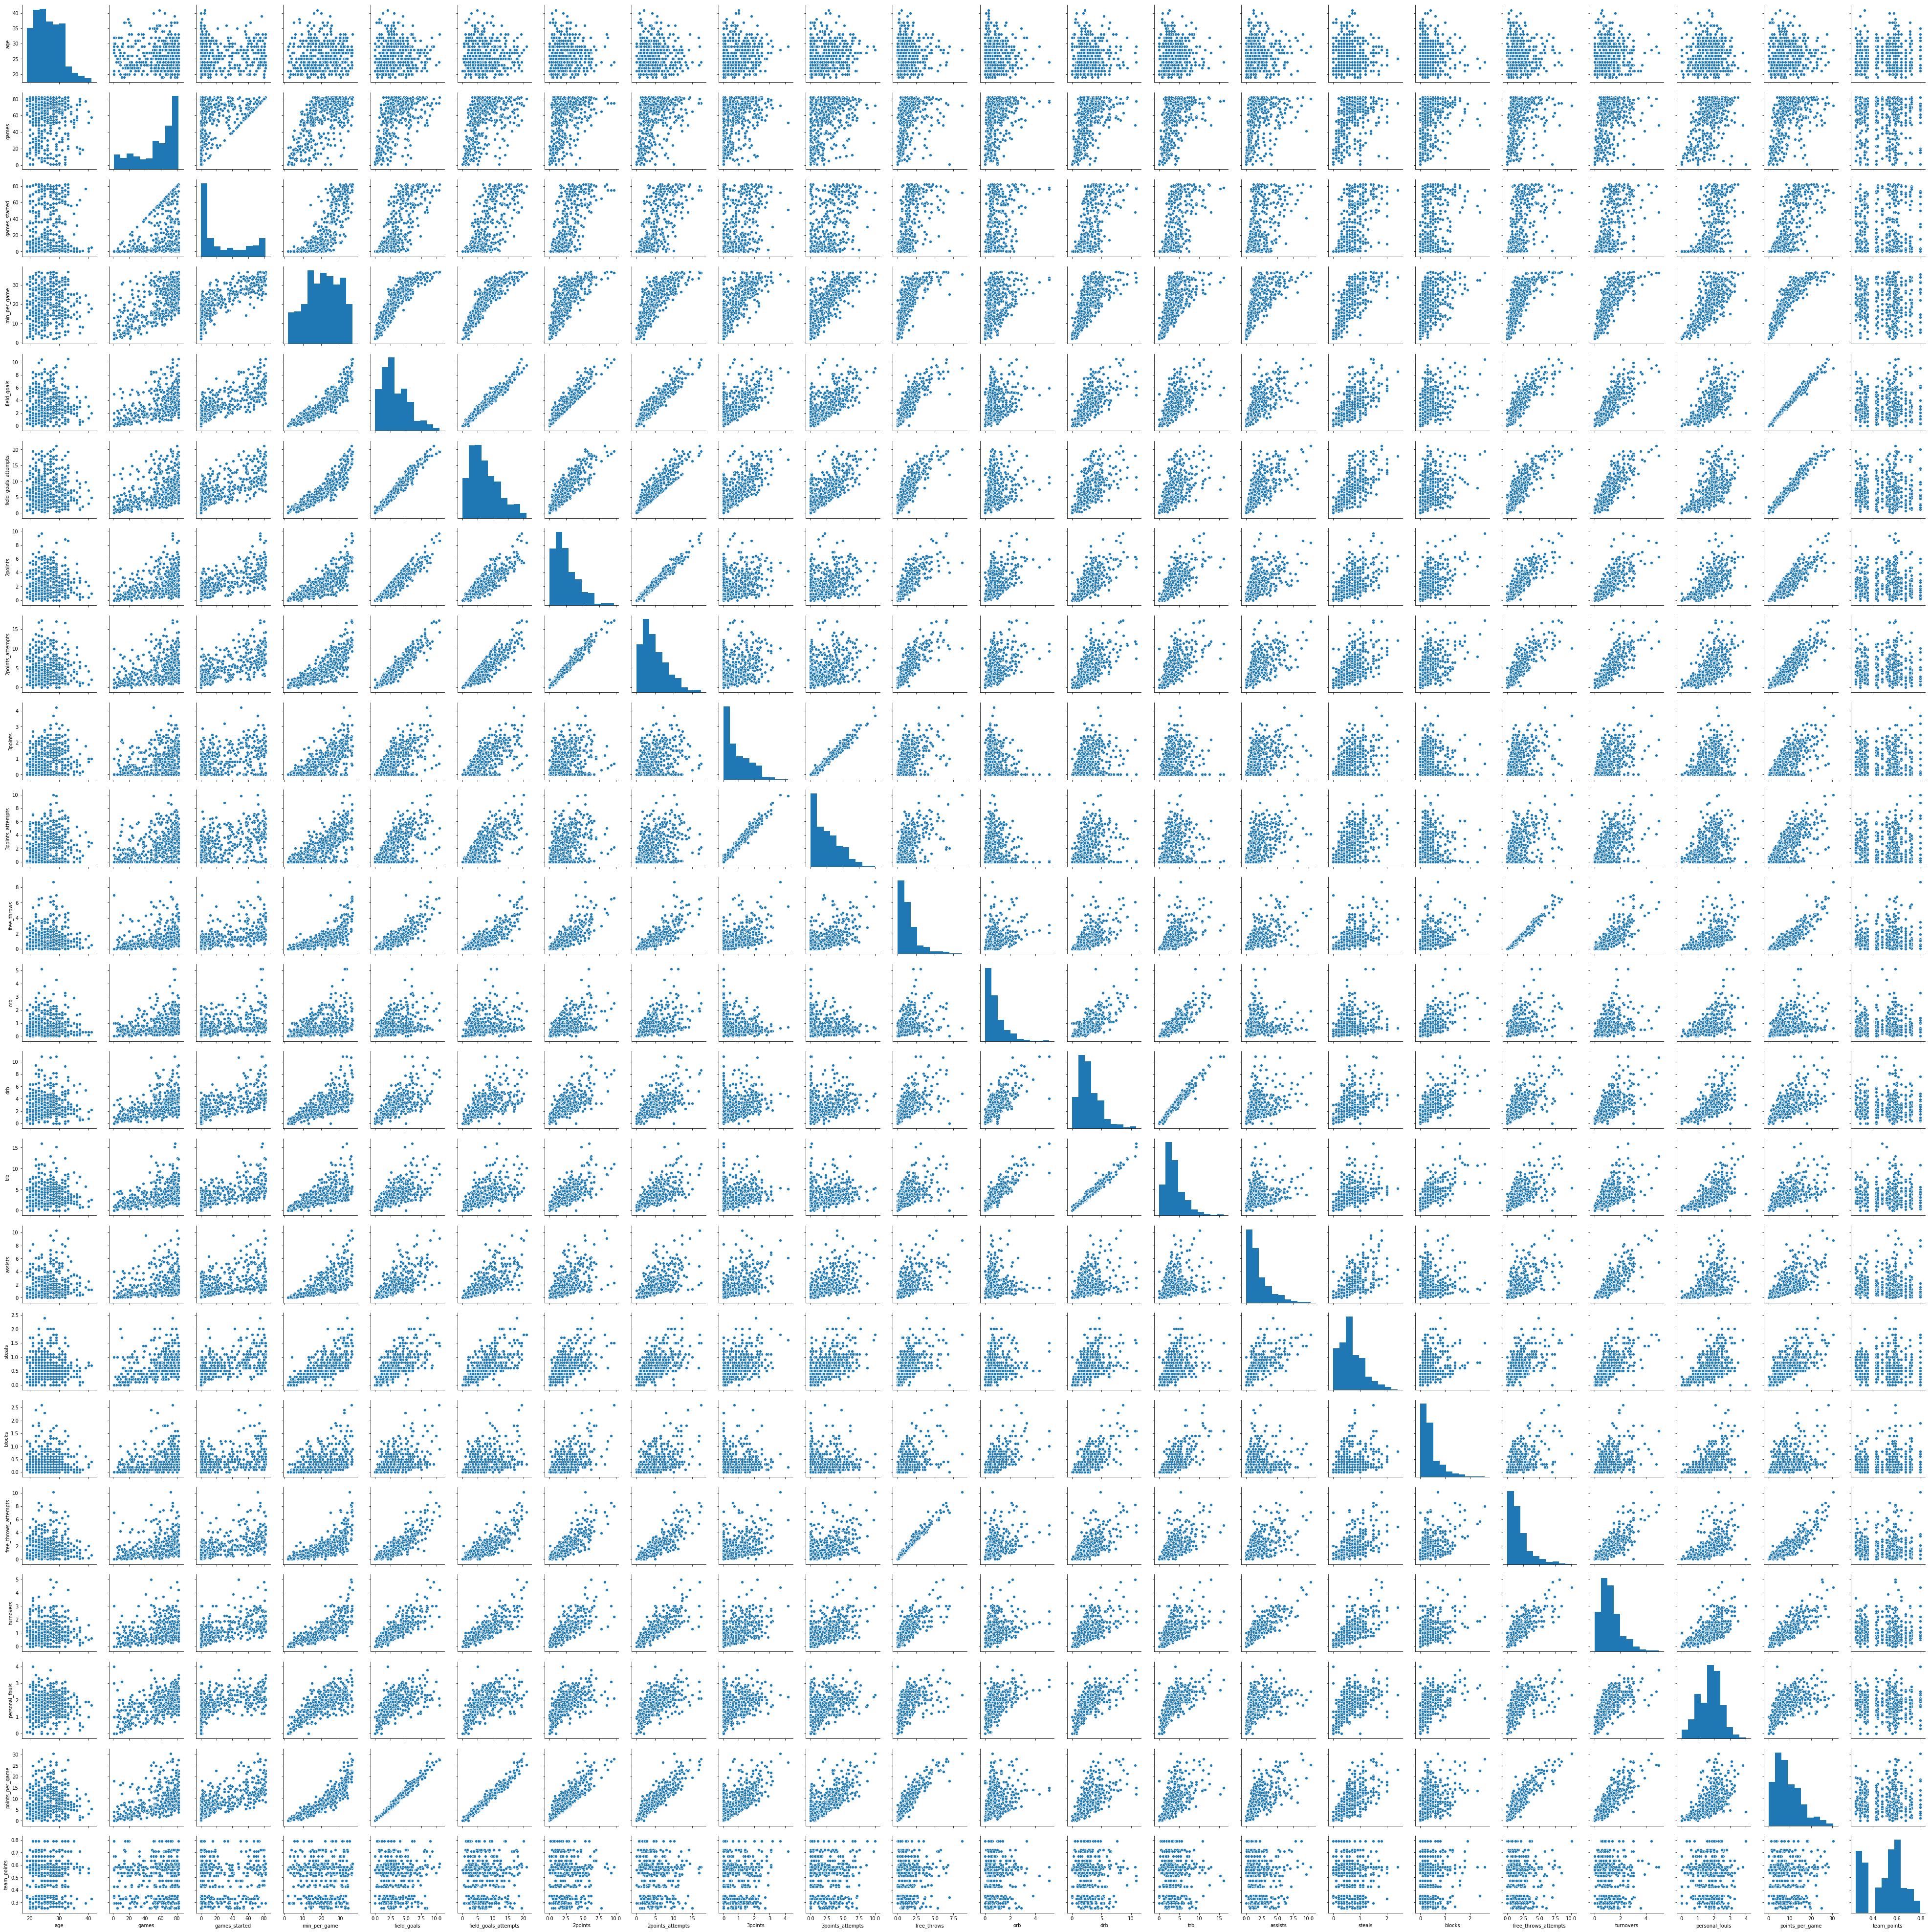

In [60]:
X = All_data[['age', 'games', 'games_started', 'min_per_game', 'field_goals', 'field_goals_attempts', '2points', '2points_attempts', \
              '3points', '3points_attempts',  'free_throws', 'orb','drb', 'trb', 'assists', 'steals', 'blocks','free_throws_attempts', \
              'turnovers', 'personal_fouls', 'points_per_game', 'team_points']]  
import seaborn as sns
sns.pairplot(data = X)

## Linear Regression - Ver 1
<li> keeping all varibles

In [75]:
# Linear regression on variables with no missing values
# Note that some columns have missing values 
# '3points_pct', '2points_pct', 'efg_pct', 'personal_fouls'

import statsmodels.api as sm

X = All_data[['age', 'games', 'games_started', 'min_per_game', 'field_goals', 'field_goals_attempts', '2points', '2points_attempts', \
              '3points', '3points_attempts',  'free_throws', 'orb','drb', 'trb', 'assists', 'steals', 'blocks','free_throws_attempts', \
              'turnovers', 'personal_fouls', 'points_per_game', 'team_points']]  ## independent variables

y = All_data['salary']  ## Dependent variable
X = sm.add_constant(X)  ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     26.13
Date:                Sat, 01 Dec 2018   Prob (F-statistic):           2.71e-65
Time:                        23:44:43   Log-Likelihood:                -7549.9
No. Observations:                 449   AIC:                         1.515e+04
Df Residuals:                     426   BIC:                         1.524e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.214e+07   1.88e+06     -6.465      0.000   -1.58e+07   -8.45e+06
age                   5.119e+05   5.67e+04      9.028      0.000       4e+05    6.23e+05
games                -7.464e+04   1.41e+04     -5.302      0.000   -1.02e+05    -4.7e+04
games_started          7.23e+04   1.48e+04      4.874      0.000    4.31e+04    1.01e+05
min_per_game           8.79e+04   9.95e+04      0.883      0.378   -1.08e+05    2.84e+05
field_goals            1.12e+07    7.9e+06      1.417      0.157   -4.33e+06    2.67e+07
field_goals_attempts -3.187e+04   5.08e+06     -0.006      0.995      -1e+07    9.96e+06
2points              -9.358e+06    5.6e+06     -1.671      0.096   -2.04e+07    1.65e+06
2points_attempts     -8.188e+05   5.04e+06     -0.162      0.871   -1.07e+07    9.09e+06
3points              -1.243e+07   6.97e+06     -1.782      0.075   -2.61e+07    1.28e+06
3points_attempts      1.065e+06   5.09e+06      0.209      0.834   -8.94e+06    1.11e+07
free_throws           3.921e+05   3.46e+06      0.113      0.910   -6.41e+06     7.2e+06
orb                  -5.105e+06   5.03e+06     -1.015      0.311    -1.5e+07    4.78e+06
drb                  -6.252e+06   4.96e+06     -1.260      0.208    -1.6e+07     3.5e+06
trb                   6.493e+06   4.95e+06      1.311      0.190   -3.24e+06    1.62e+07
assists               6.569e+05   3.02e+05      2.173      0.030    6.28e+04    1.25e+06
steals               -3.001e+05   8.95e+05     -0.335      0.738   -2.06e+06    1.46e+06
blocks                5.862e+05   9.18e+05      0.638      0.524   -1.22e+06    2.39e+06
free_throws_attempts  7.977e+05    1.1e+06      0.726      0.468   -1.36e+06    2.96e+06
turnovers            -1.589e+06   8.87e+05     -1.791      0.074   -3.33e+06    1.55e+05
personal_fouls       -8.489e+05   6.25e+05     -1.358      0.175   -2.08e+06     3.8e+05
points_per_game       5.216e+04   3.36e+06      0.016      0.988   -6.54e+06    6.65e+06
team_points           4.014e+06   1.71e+06      2.342      0.020    6.45e+05    7.38e+06
==============================================================================
Omnibus:                       33.986   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.287
Skew:                           0.496   Prob(JB):                     2.20e-13
Kurtosis:                       4.459   Cond. No.                     3.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear Regression - Ver 2

In [76]:
# Linear regression on variables that I think are good ones qualitatively


import statsmodels.api as sm

X = All_data[['age', 'games', 'games_started', 'min_per_game', '3points', 'field_goals', 'orb', \
              'free_throws_attempts', 'blocks', 'points_per_game','Position_back','Position_front','min_per_game','personal_fouls']]  ## independent variables

y = All_data['salary']  ## Dependent variable
X = sm.add_constant(X)  ## let's add an intercept (beta_0) to our model

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     41.03
Date:                Sat, 01 Dec 2018   Prob (F-statistic):           2.64e-67
Time:                        23:45:29   Log-Likelihood:                -7562.0
No. Observations:                 449   AIC:                         1.515e+04
Df Residuals:                     435   BIC:                         1.521e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.086e+07   3.98e+06     -2.727      0.007   -1.87e+07   -3.03e+06
age                   5.519e+05   5.58e+04      9.898      0.000    4.42e+05    6.62e+05
games                -6.107e+04   1.35e+04     -4.517      0.000   -8.76e+04   -3.45e+04
games_started         7.349e+04    1.5e+04      4.887      0.000    4.39e+04    1.03e+05
min_per_game          4.878e+04    4.4e+04      1.108      0.269   -3.78e+04    1.35e+05
3points               1.241e+06   1.45e+06      0.855      0.393   -1.61e+06    4.09e+06
field_goals           5.396e+05    2.5e+06      0.216      0.829   -4.37e+06    5.45e+06
orb                   1.398e+06   5.65e+05      2.473      0.014    2.87e+05    2.51e+06
free_throws_attempts  1.239e+06   1.04e+06      1.191      0.234   -8.06e+05    3.28e+06
blocks                6.821e+05   8.85e+05      0.770      0.441   -1.06e+06    2.42e+06
points_per_game      -1.009e+05   1.23e+06     -0.082      0.934   -2.51e+06    2.31e+06
Position_back        -6.795e+05   3.63e+06     -0.187      0.852   -7.81e+06    6.45e+06
Position_front       -1.361e+05   3.62e+06     -0.038      0.970   -7.26e+06    6.99e+06
min_per_game          4.878e+04    4.4e+04      1.108      0.269   -3.78e+04    1.35e+05
personal_fouls       -1.447e+06   5.66e+05     -2.556      0.011   -2.56e+06   -3.34e+05
==============================================================================
Omnibus:                       43.749   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.531
Skew:                           0.580   Prob(JB):                     7.27e-19
Kurtosis:                       4.766   Cond. No.                     2.65e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.12e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [73]:
# #pip install yellowbrick
import sys
!{sys.executable} -m pip install yellowbrick
# #! pip install -m yellowbrick

In [72]:
import yellowbrick

## Lasso Regression

In [74]:
from sklearn.model_selection import train_test_split

# Specify the features of interest and the target

# Extract the instances and target
X = All_data[['age', 'games', 'games_started', 'min_per_game', 'field_goals', 'field_goals_attempts', '2points', '2points_attempts', \
              '3points', '3points_attempts',  'free_throws', 'orb','drb', 'trb', 'assists', 'steals', 'blocks','free_throws_attempts', \
              'turnovers', 'personal_fouls', 'points_per_game', 'team_points']]
y = All_data['salary'] 

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


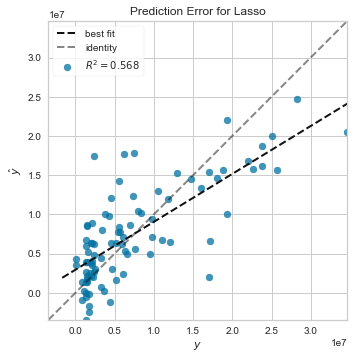

In [75]:
from sklearn.linear_model import Lasso

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
lasso = Lasso()
visualizer = PredictionError(lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

## Ridge Regression

135 135
linear regression train score: 0.5604363433994224
linear regression test score: 0.5831415345920445
ridge regression train score low alpha: 0.5604200249625928
ridge regression test score low alpha: 0.5836999123213901
ridge regression train score high alpha: 0.5359601055642469
ridge regression test score high alpha: 0.5847498590458193


/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  Otherwise, the result is the absolute distance between *size1* and
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  Otherwise, the result is the absolute distance between *size1* and


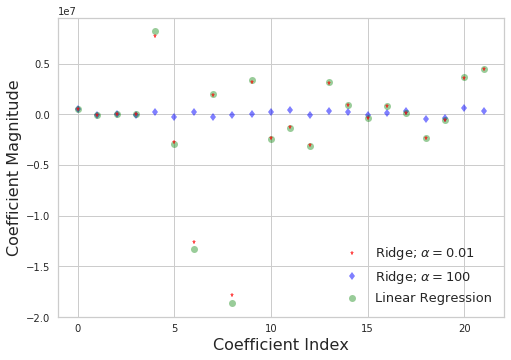

In [82]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

newX = All_data[['age', 'games', 'games_started', 'min_per_game', 'field_goals', 'field_goals_attempts', '2points', '2points_attempts', \
              '3points', '3points_attempts',  'free_throws', 'orb','drb', 'trb', 'assists', 'steals', 'blocks','free_throws_attempts', \
              'turnovers', 'personal_fouls', 'points_per_game', 'team_points']]

newY = All_data['salary'] 


#print type(newY)# pandas core frame

X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
print (len(X_test), len(y_test))
lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print ( "linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()


### Accuracy Check

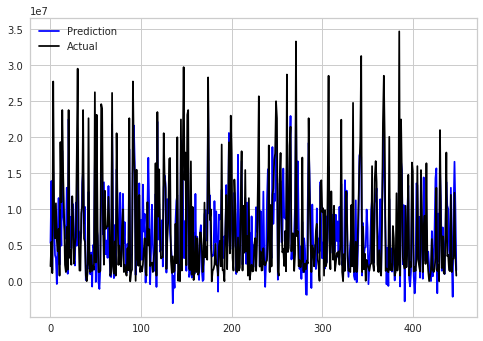

In [87]:
import matplotlib.pyplot as plt 
k=predictions.astype(int)
plt.plot(k ,label = "Prediction",color='Blue')
plt.plot(y ,label='Actual',color='Black')
plt.legend() 

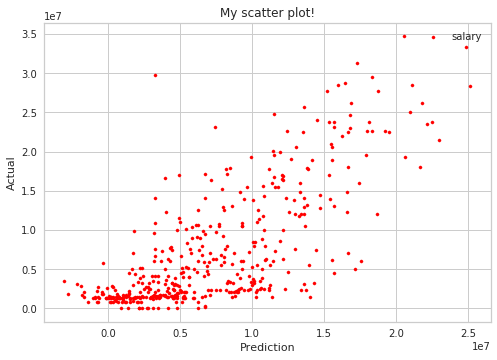

In [84]:
plt.scatter(k,y,label = "salary",color='red',s=10)
# x-axis label 
plt.xlabel('Prediction') 
# frequency label 
plt.ylabel('Actual') 
# plot title 
plt.title('My scatter plot!') 
# showing legend 
plt.legend() 